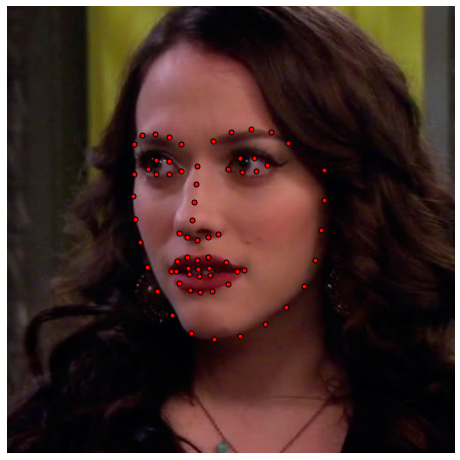

In [1]:
import menpo.io as mio
from menpo.transform import ThinPlateSplines as TPS
from menpo.transform import PiecewiseAffine as PWA
from menpowidgets import visualize_images as vi
import matplotlib.pyplot as plt
import os


working_dir = "/Users/Lee/Desktop/Menpo_Playground_With_Mynotes/menpo_playground/mycode"

os.listdir( working_dir )

sheldon = mio.import_image( working_dir + "/Sheldon.png" )
maxb = mio.import_image( working_dir + "/Max.jpg" )


%matplotlib inline
vi( [ sheldon, maxb ] )




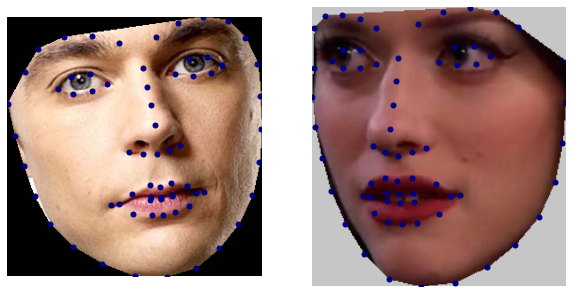

In [2]:
sheldon = sheldon.as_masked().constrain_mask_to_landmarks().crop_to_landmarks()
maxb = maxb.as_masked().constrain_mask_to_landmarks().crop_to_landmarks()
plt.subplot( 121 )
sheldon.view_landmarks();
plt.subplot( 122 )
maxb.view_landmarks();

In [3]:
pwa_sheldon_to_maxb = PWA( sheldon.landmarks[ 'PTS' ].lms, maxb.landmarks[ 'PTS' ].lms )
tps_sheldon_to_maxb = TPS( sheldon.landmarks[ 'PTS' ].lms, maxb.landmarks[ 'PTS' ].lms )


pwa_maxb_to_sheldon = PWA( maxb.landmarks[ 'PTS' ].lms, sheldon.landmarks[ 'PTS' ].lms )
tps_maxb_to_sheldon = TPS( maxb.landmarks[ 'PTS' ].lms, sheldon.landmarks[ 'PTS' ].lms )

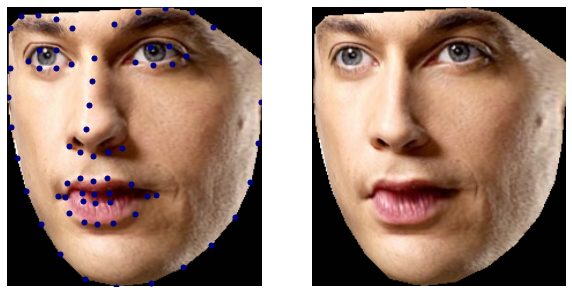

In [4]:
warped_sheldon_to_maxb_pwa = sheldon.as_unmasked( copy = False ).warp_to_mask( maxb.mask, pwa_maxb_to_sheldon )
warped_sheldon_to_maxb_tps = sheldon.as_unmasked( copy = False ).warp_to_mask( maxb.mask, tps_maxb_to_sheldon )

plt.subplot( 121 )
warped_sheldon_to_maxb_pwa.view_landmarks();
plt.subplot( 122 )
warped_sheldon_to_maxb_tps.view();


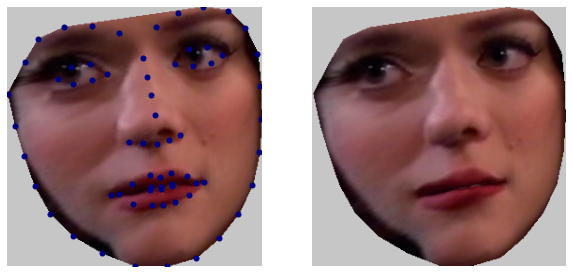

In [5]:
warped_maxb_to_sheldon_pwa = maxb.as_unmasked( copy = False ).warp_to_mask( sheldon.mask, pwa_sheldon_to_maxb )
warped_maxb_to_sheldon_tps = maxb.as_unmasked( copy = False ).warp_to_mask( sheldon.mask, tps_sheldon_to_maxb ) 

plt.subplot( 121 )
warped_maxb_to_sheldon_pwa.view_landmarks();
plt.subplot( 122 )
warped_maxb_to_sheldon_tps.view();
